<a href="https://colab.research.google.com/github/Tazimahamad/Tazimahamad/blob/main/concrete_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install pandas

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('/content/Concrete_Data_Yeh.csv')

In [63]:
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [64]:
df.shape

(1030, 9)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [67]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [68]:
df.duplicated().sum()

25

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   csMPa             1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


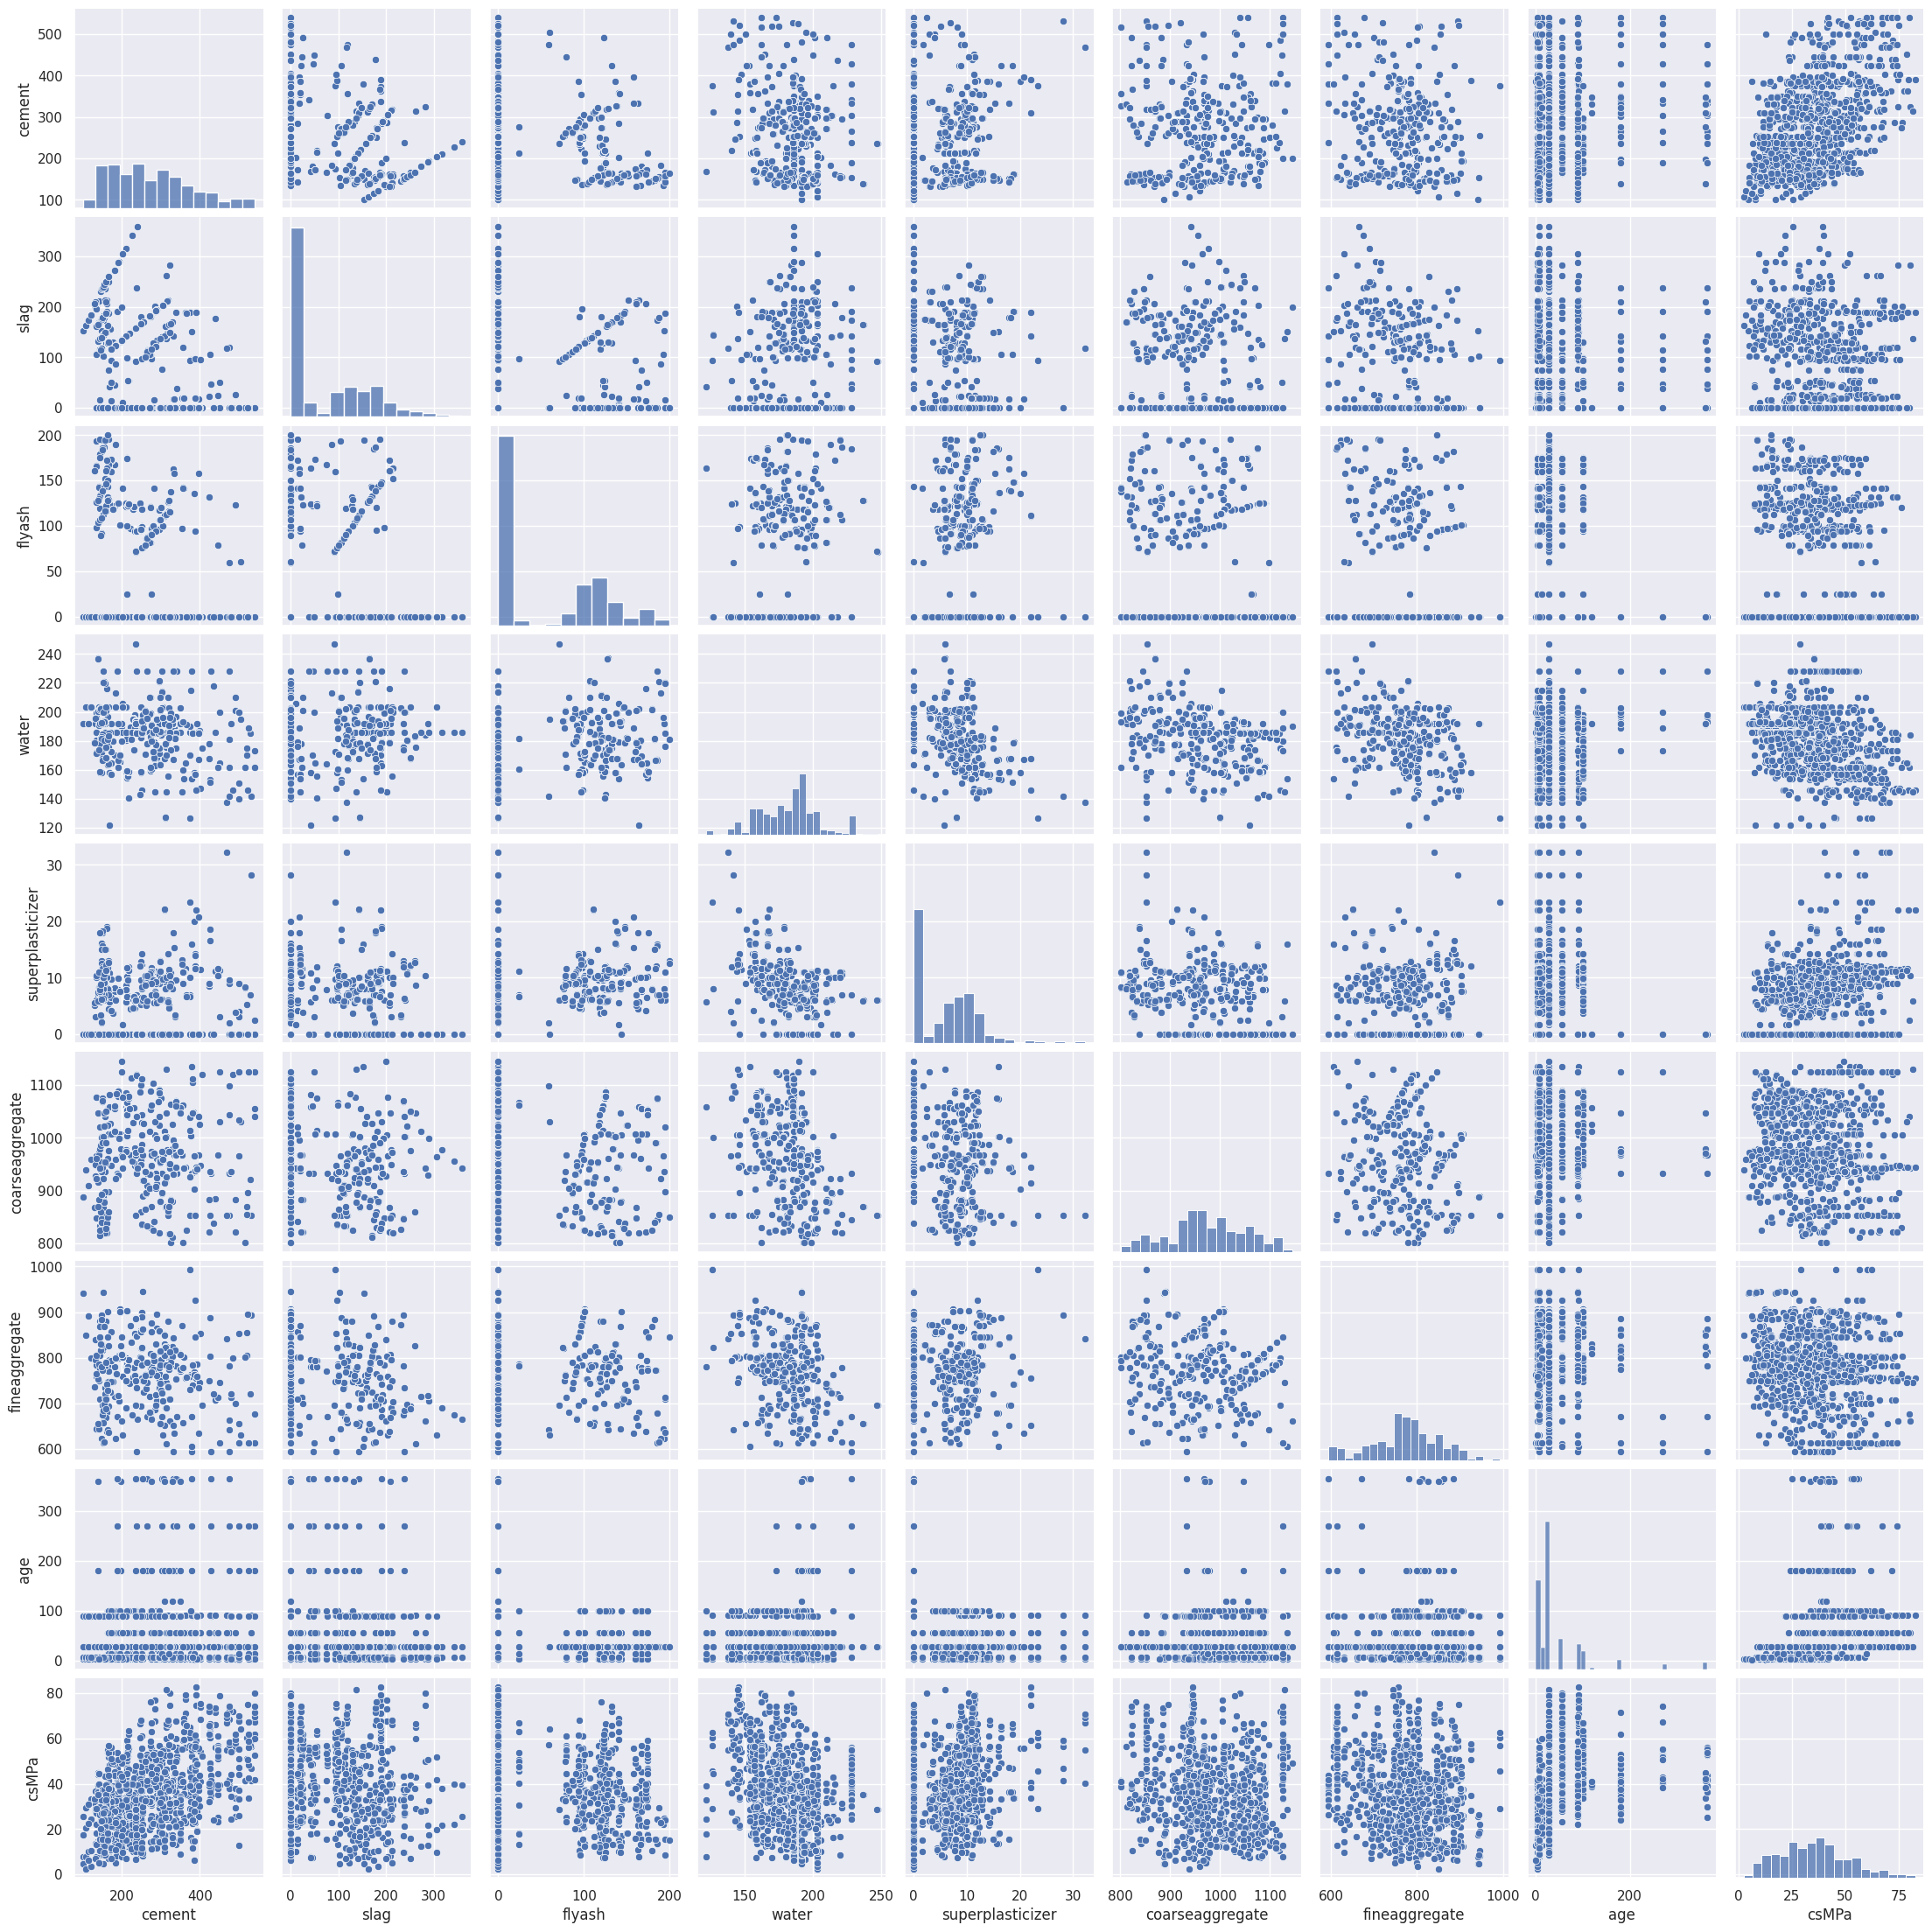

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

sns.pairplot(df)

plt.show()

In [72]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

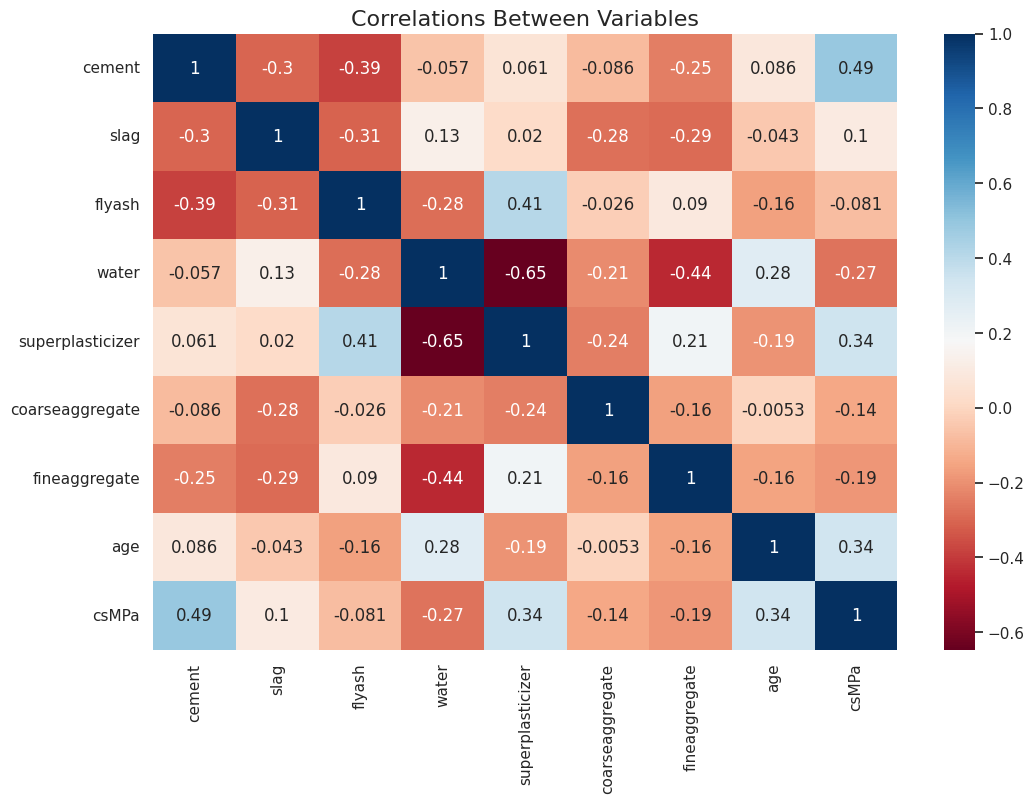

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

In [74]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [78]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [80]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

In [81]:
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "LinearRegression", "MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}



MAE: 8.22745522836176
MSE: 107.56688279872874
r2 Score: 0.5616682220322875
RMSE (Cross Validated): 10.983075882282813


In [82]:

from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNN model
knn_reg = KNeighborsRegressor()

# Fit KNN model to training data
knn_reg.fit(X_train, y_train)

# Predict using KNN model
predictions = knn_reg.predict(X_test)

# Evaluate predictions
mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(knn_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

# Create new row for KNN model
new_row = {"Model": "KNN", "MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}

# Calculate accuracy (R-squared)
accuracy = r2_score(y_test, predictions)

print("R-squared (Accuracy):", accuracy)

MAE: 7.42439800995025
MSE: 86.2099592835821
r2 Score: 0.6486970362243942
RMSE (Cross Validated): 11.997164557934612
R-squared (Accuracy): 0.6486970362243942


In [83]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Instantiate Lasso model
lasso_reg = Lasso()

# Fit Lasso model to training data
lasso_reg.fit(X_train, y_train)

# Predict using Lasso model
predictions = lasso_reg.predict(X_test)

# Evaluate predictions
mae, mse, r2 = evaluate(y_test, predictions)  # Assuming you have an evaluate function defined
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

# Calculate RMSE (if you have a function for it)
rmse = rmse_cv(lasso_reg)
print("RMSE (Cross Validated):", rmse)

# Calculate accuracy (R-squared)
accuracy = r2_score(y_test, predictions)

print("R-squared (Accuracy):", accuracy)


MAE: 8.863044411937205
MSE: 115.72884228272632
r2 Score: 0.5284084852133326
RMSE (Cross Validated): 11.612295575311416
R-squared (Accuracy): 0.5284084852133326


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate Random Forest model
random_forest_reg = RandomForestRegressor()

# Fit Random Forest model to training data
random_forest_reg.fit(X_train, y_train)

# Predict using Random Forest model
predictions = random_forest_reg.predict(X_test)

# Evaluate predictions
mae, mse, r2 = evaluate(y_test, predictions)  # Assuming you have an evaluate function defined
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

# Calculate RMSE (if you have a function for it)
rmse = rmse_cv(random_forest_reg)
print("RMSE (Cross Validated):", rmse)

# Calculate accuracy (R-squared)
accuracy = r2_score(y_test, predictions)

print("R-squared (Accuracy):", accuracy)


MAE: 3.41110914593698
MSE: 23.7522974264169
r2 Score: 0.903210109925559
RMSE (Cross Validated): 10.187892629912914
R-squared (Accuracy): 0.903210109925559


In [85]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Instantiate Elastic Net model
elastic_net = ElasticNet()

# Fit Elastic Net model to training data
elastic_net.fit(X_train, y_train)

# Predict using Elastic Net model
predictions = elastic_net.predict(X_test)

# Evaluate predictions
mae, mse, r2 = evaluate(y_test, predictions)  # Assuming you have an evaluate function defined
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

# Calculate RMSE (if you have a function for it)
rmse = rmse_cv(elastic_net)
print("RMSE (Cross Validated):", rmse)

# Calculate accuracy (R-squared)
accuracy = r2_score(y_test, predictions)

print("R-squared (Accuracy):", accuracy)


MAE: 9.093381635483425
MSE: 123.46866546733787
r2 Score: 0.49686894098377166
RMSE (Cross Validated): 12.418741937178366
R-squared (Accuracy): 0.49686894098377166


In [86]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Instantiate SVM model
svm_reg = SVR()

# Fit SVM model to training data
svm_reg.fit(X_train, y_train)

# Predict using SVM model
predictions = svm_reg.predict(X_test)

# Evaluate predictions
mae, mse, r2 = evaluate(y_test, predictions)  # Assuming you have an evaluate function defined
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

# Calculate RMSE (if you have a function for it)
rmse = rmse_cv(svm_reg)
print("RMSE (Cross Validated):", rmse)

# Calculate accuracy (R-squared)
accuracy = r2_score(y_test, predictions)

print("R-squared (Accuracy):", accuracy)


MAE: 7.763630954613399
MSE: 97.05583548411131
r2 Score: 0.6045004203617669
RMSE (Cross Validated): 12.030395231584913
R-squared (Accuracy): 0.6045004203617669
